<a href="https://colab.research.google.com/github/scoobiii/gdpBrazilgoal/blob/main/gdpBrazilgoal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

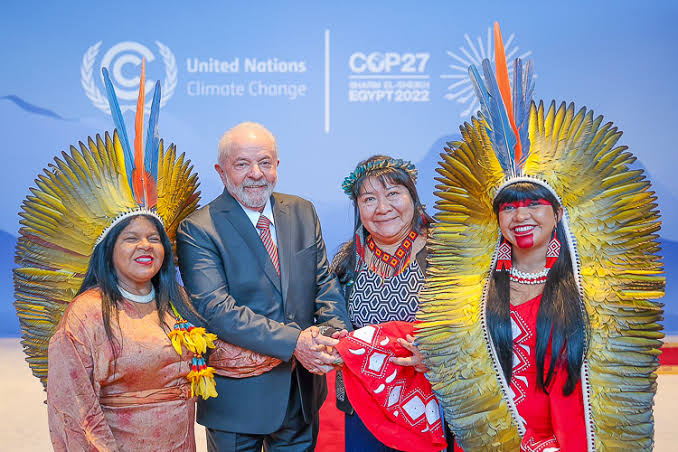
##Meta Brazil Lula

#ODS2026
Brazil Renda per Capita 14 ETH (USD 16.987,46)

#ODS 2030
Brazil Renda per Capita 42 ETH (USD 50.000,00)

#ODS 2050
Brazil Renda  per Capita 150 ETH (USD 182070,01)


Histórico:
A criação e distribuição renda per capita brasileira evoluiu para USD13.400,00 (2011) e decaiu para USD7500,00 (2022)



Aprender com os Universitários:

O Pré-sal em, Maricá, RJ, conquistou renda per capita de USD 2000,00 (2011) para US$ 45.000,00 (2019), maior que o Japão USS39.000,00

Qual a vocação e demanda que cada um dos municipios brasileiros possui?

Basta ser melhor que

.Japão, 

.Noruega, renda per capita USD 89.000,00 graças ao Présal noruegues, que sustenta o fundo soberano Norges Bank Investment Management (NBIM) com USD 1.4 trilhões, 4 vezes seu PIB nacional, investidps em 9300 companhias em mais de 70 países.

https://www.nbim.no/en/the-fund/Market-Value/


. Mônaco, renda per capita USD 173.000,00.





##Mão na massa

In [ ]:
# Python
import pandas as pd
from prophet import Prophet

Buscar dataset gdpBR 1960 a 2021 do git hub editado á mão até aprender a buscar direto no world bank

mundo trabalhando e o Brasil fazendo merda.

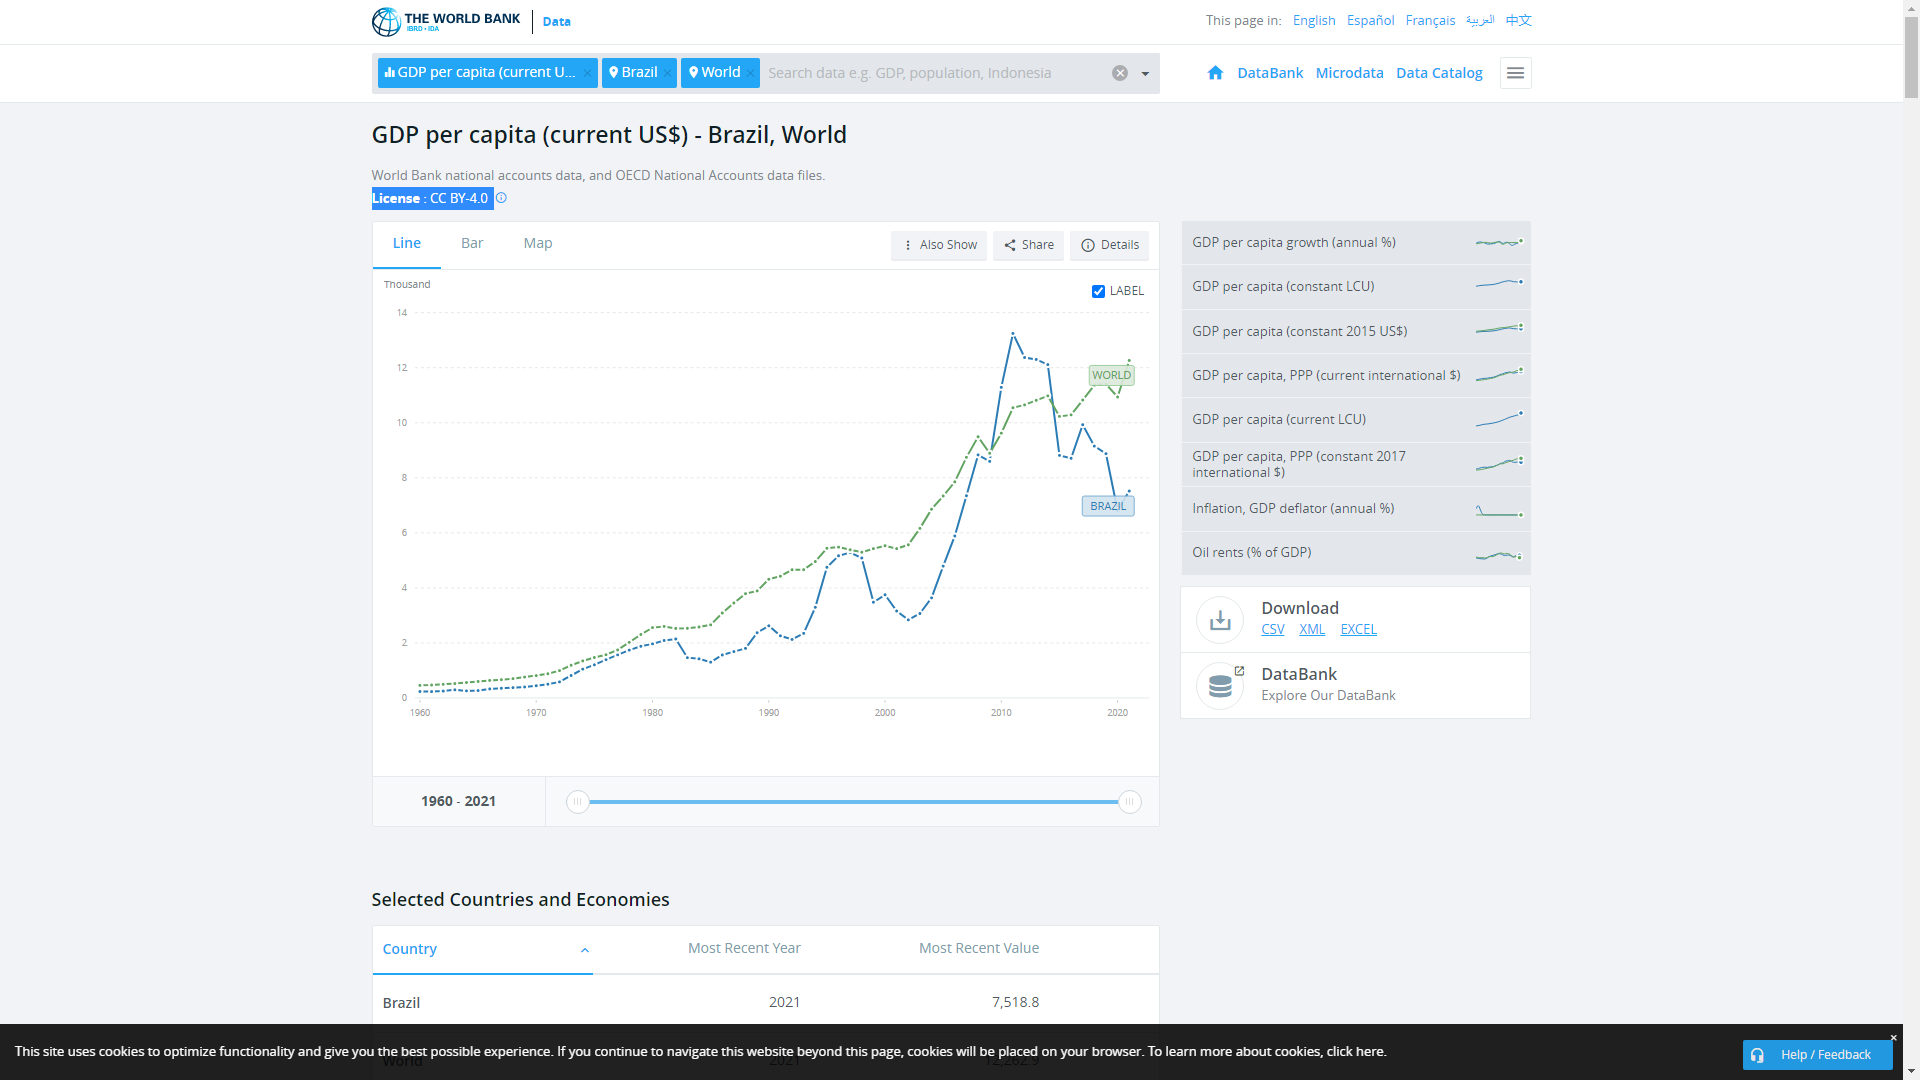

In [ ]:
# Python
gdpBrazilgoal = pd.read_csv('https://raw.githubusercontent.com/scoobiii/brazilG50kG/main/brazilG50Gpropducao3.csv')
gdpBrazilgoal.head()

ds     y
0  1960-12-12  2359
1  1961-01-12  2325
2  1962-01-12  2513
3  1963-12-12  2956
4  1964-12-12  2586

As previsões são feitas em um dataframe com uma coluna ds contendo as datas para as quais uma previsão deve ser feita. Você pode obter um dataframe adequado que se estenda no futuro por um número especificado de dias usando o método auxiliar Prophet.make_future_dataframe. Por padrão, ele também incluirá as datas do histórico, para que possamos ver o ajuste do modelo também.

In [ ]:
# Python
m = Prophet()
m.fit(gdpBrazilgoal)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2n3o1v17/4hqkveqf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2n3o1v17/h4ssfi41.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77823', 'data', 'file=/tmp/tmp2n3o1v17/4hqkveqf.json', 'init=/tmp/tmp2n3o1v17/h4ssfi41.json', 'output', 'file=/tmp/tmp2n3o1v17/prophet_modelqqtsu_bo/prophet_model-20221118122147.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:21:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:21:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


O método de previsão atribuirá a cada linha no futuro um valor previsto que ele chama de yhat. Se passar datas históricas, isso fornecerá um ajuste dentro da amostra. O objeto de previsão aqui é um novo dataframe que inclui uma coluna yhat com a previsão, bem como colunas para componentes e intervalos de incerteza.


In [ ]:
# Python
gdpBrazilfuturo = m.make_future_dataframe(periods=43365)
gdpBrazilfuturo.tail()

ds
43422 2140-08-31
43423 2140-09-01
43424 2140-09-02
43425 2140-09-03
43426 2140-09-04

In [ ]:
# Python
forecast = m.predict(gdpBrazilfuturo)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
43422 2140-08-31  22320.329378  19182.140053  25461.001983
43423 2140-09-01  21947.304942  19071.442377  25177.085178
43424 2140-09-02  21620.572748  18380.889482  24770.750415
43425 2140-09-03  21350.872399  18271.592546  24491.431017
43426 2140-09-04  21147.312684  18145.012587  24345.878831

In [ ]:


# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

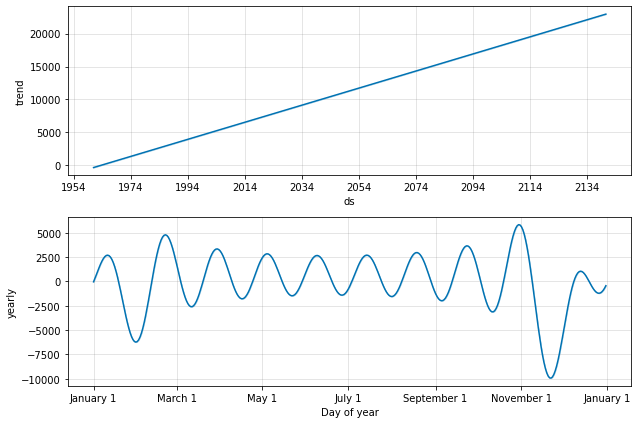

In [ ]:
# Python
gdpComponetes = m.plot_components(forecast)

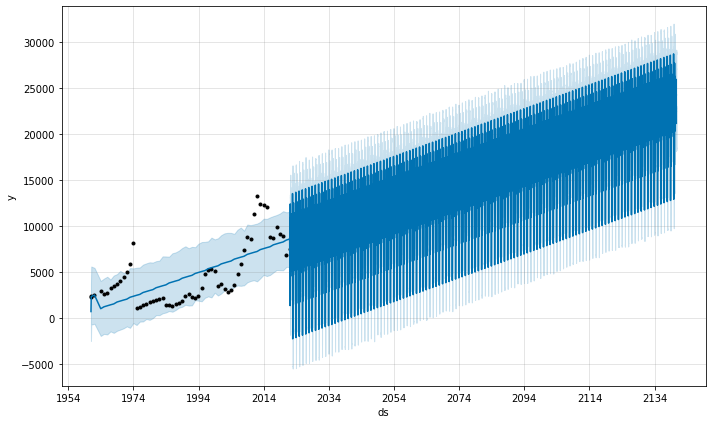

In [ ]:
# Python
fig1 = m.plot(forecast)